# Plotting Notebook.

Subsequent code frame loads all important variables for us to play with

In [39]:
import matplotlib.pyplot
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

from benchmark.benchmark_validators import BenchmarkRun
from benchmark.config import get_config
from benchmark.results_processing import load_benchmark_run, create_dataframe, print_statistics

# Get the config from the config factory. (If you don't have a config, consider instantiating a config object here)
# config = BenchmarkConfig(...)
config = get_config()

# filename = "2025-06-09/pcbm_20250609-160559_YfMFhLG8S70lT0b0uyjIbpQ5LO5mUeqes8VT9ZIhjFs=.json"

# Inline VS No Inline No Burn in. Algo RB_GS
# filename = "2025-06-12/pcbm_20250612-090840_W_OGndEVkfDbsBaitgK_DLwbQpkxDbD6LKJ2Mg5P25k=.json"

# Inline VS No Inline Burn In Algo RB_GS
filename = "2025-06-13/pcbm_20250613-133542_ysNOGFiq8dXaph0kQ7vASjTpXfW_8mw05zNDtmZgRo8=.json"

bmr: BenchmarkRun = load_benchmark_run(config=config, path=filename)
bmr_dtf = create_dataframe(bmr)

# Set interactive plotting mode
matplotlib.pyplot.ion()

Prepare some common plots

In [96]:
# Module VS Runtimeny:
bmr_dtf["group-cpu-nx-ny"] = bmr_dtf.apply(lambda row: f"cpu:{row.cpu_count} dim: {row.nx} x {row.ny}", axis=1)
bmr_dtf["group-module-nx-ny"] = bmr_dtf.apply(lambda row: f"module:{row.module} dim: {row.nx} x {row.ny}", axis=1)
bmr_dtf["dim"] = bmr_dtf.apply(lambda row: f"dim: {row.nx} x {row.ny}", axis=1)
bmr_dtf["group-module-cpu"] = bmr_dtf.apply(lambda row: f"module:{row.module} cpu:{row.cpu_count}", axis=1)


In [57]:
_ = print_statistics(run=bmr)

Benchmark Results of VX Benchmark
Module                cpu_count    nx    ny    runtime std:    runtime avg    runtime std norm:    runtime avg norm    number of samples
------------------  -----------  ----  ----  --------------  -------------  -------------------  ------------------  -------------------
base_rb_gs                    8   128   128     0.000523301     0.00459707          2.49529e-10         2.19205e-09                   15
base_rb_gs                    8   256   256     0.000297033     0.0154729           3.5409e-11          1.84452e-09                   15
base_rb_gs                    8   512   512     0.00373159      0.0645951           1.1121e-10          1.92508e-09                   15
base_rb_gs                    8  1024  1024     0.00631842      0.247921            4.70759e-11         1.84716e-09                   15
base_rb_gs                    8  2048  2048     0.0139974       1.51669             2.60722e-11         2.82506e-09                   15
base_rb

In [95]:
print(bmr_dtf.columns)

Index(['cpu_count', 'module', 'benchmark_type', 'max_iter', 'nx', 'ny',
       'cache_bs_1', 'cache_bs_2', 'sample', 'duration', 'normalized_duration',
       'name', 'group-cpu-nx-ny', 'group-module-nx-ny', 'dim'],
      dtype='object')


Text(0.5, 1.0, 'Runtime Module VS cpu x dim')

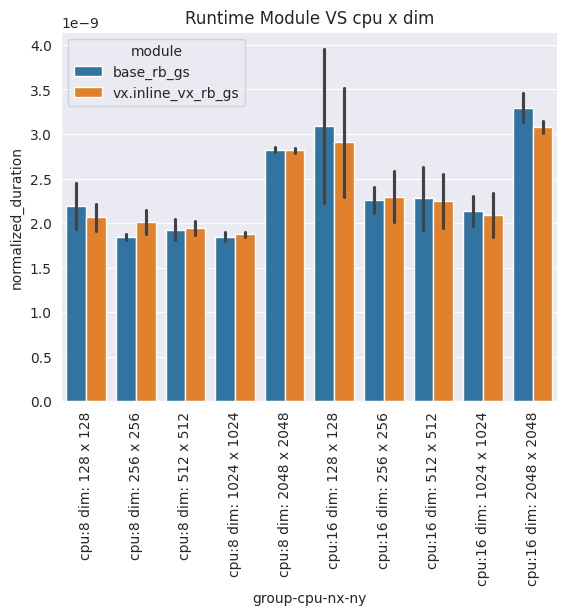

In [83]:
plt.xticks(rotation=90)

sns.barplot(bmr_dtf, x="group-cpu-nx-ny", y="normalized_duration", hue="module", errorbar="sd").set_title("Runtime Module VS Cpu x Dim")


Text(0.5, 1.0, 'Runtime Module VS Dim only, CPU=16')

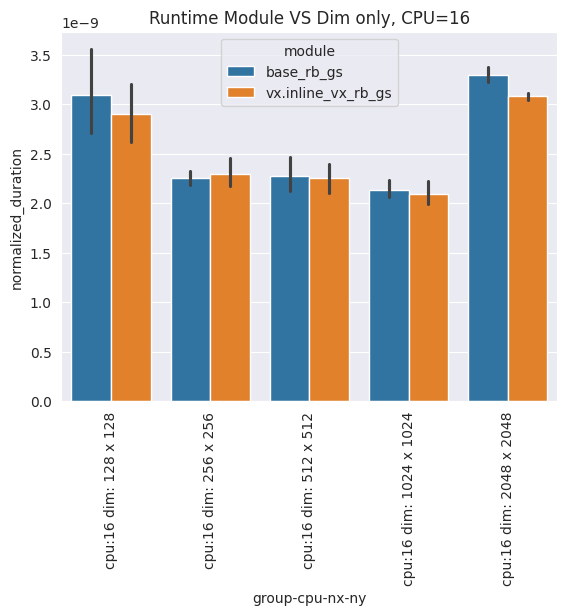

In [84]:
plt.xticks(rotation=90)
sns.barplot(bmr_dtf.query("cpu_count == 16"), x="group-cpu-nx-ny", y="normalized_duration", hue="module").set_title("Runtime Module VS Dim only, CPU=16")


Text(0.5, 1.0, 'Runtime Module VS Dim only, CPU=8')

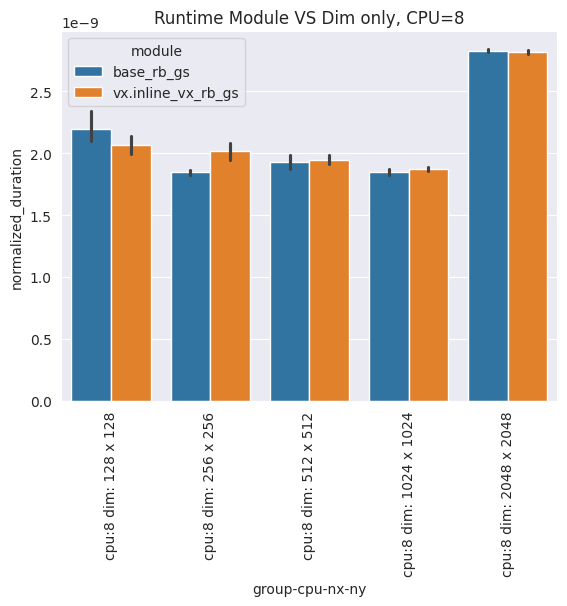

In [85]:
plt.xticks(rotation=90)
sns.barplot(bmr_dtf.query("cpu_count == 8"), x="group-cpu-nx-ny", y="normalized_duration", hue="module").set_title("Runtime Module VS Dim only, CPU=8")


Text(0.5, 1.0, 'Runtime CPU count VS Module x Dim only')

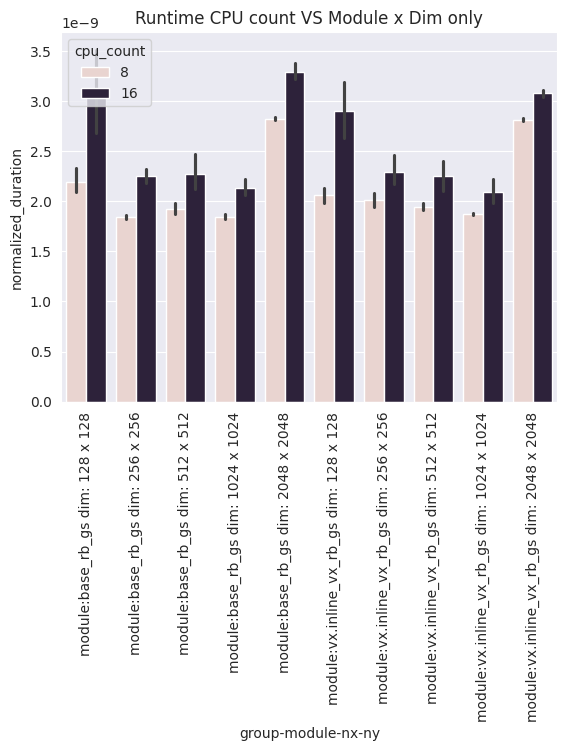

In [87]:
plt.xticks(rotation=90)
sns.barplot(bmr_dtf, x="group-module-nx-ny", y="normalized_duration", hue="cpu_count").set_title("Runtime CPU count VS Module x Dim only")
# sns.catplot(bmr_dtf, x="group-module-nx-ny", y="normalized_duration", col="cpu_count", kind="box")

<Axes: xlabel='dim', ylabel='normalized_duration'>

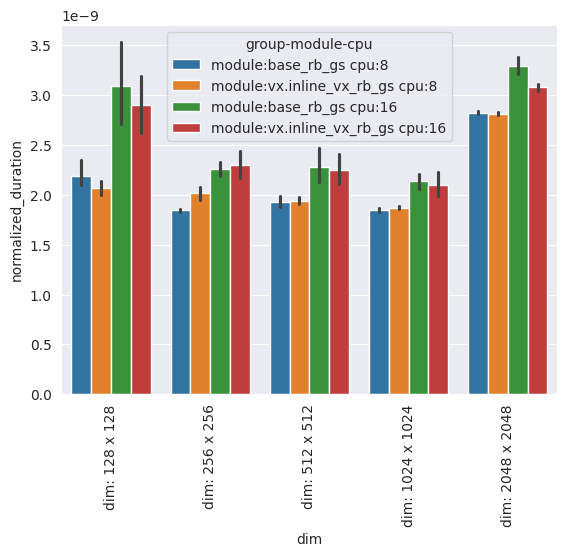

In [97]:
plt.xticks(rotation=90)
sns.barplot(bmr_dtf, x="dim", y="normalized_duration", hue="group-module-cpu")

<Axes: xlabel='group-module-cpu', ylabel='normalized_duration'>

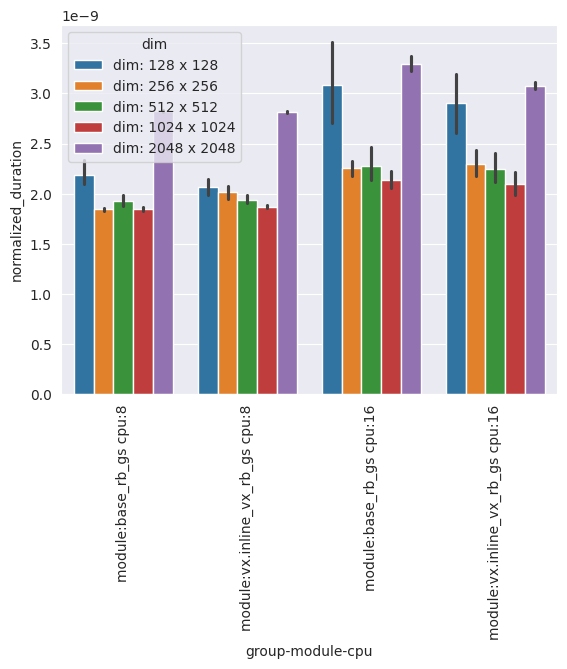

In [98]:
plt.xticks(rotation=90)
sns.barplot(bmr_dtf, x="group-module-cpu", y="normalized_duration", hue="dim")